In [23]:
import numpy.random as dist
import numpy as np
import tqdm
import os

import matplotlib.pyplot as plt
from plot_utils import *


In [24]:
path_to_figures = "figures"

In [25]:
def gaussian_likelihood(x, μ=0, σ=1):
    """ Quality of the proposal vector
            Use the same mean and variance for all the parameters
    """

    quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)

    return quality

def acceptance_probability(x, xs, likelihood=gaussian_likelihood):
    """ Acceptance probability for the Metropolis-Hastings algorithm

    Args:
        x (_type_): _description_
        xs (_type_): _description_
        likelihood (_type_, optional): _description_. Defaults to gaussian_likelihood.

    Returns:
        _type_: _description_
    """
    return likelihood(x) / likelihood(xs)


def proposal_density(x, s=0.2, d=2, samples=1):
    """ Proposal density for the Metropolis-Hastings algorithm

    Args:
        x np.array: state of the chain. It's a column vector of dimension d.
        s (float, optional): siz. Defaults to 0.2.
        d (int, optional): dimension of the . Defaults to 2.

    Returns:
        np.array: _description_
    """

    Σ = (s**2) * np.eye(d)

    xs = dist.multivariate_normal(x, Σ , size=1).T
    xs = np.squeeze(xs, axis=1)

    return xs


def mcmc_metropolis_hasting(acceptance_probability, proposal_density, x0, num_samples=1000):
    """ Metropolis-Hastings algorithm

    Args:
        quality_state (function): quality of the state
        proposal_density (function): proposal density
        x0 (np.array): initial state
        n_samples (int, optional): number of samples. Defaults to 1000.

    Returns:
        np.array: samples
    """
    d = x0.shape[0]

    samples = np.zeros((num_samples, d))
    x       = x0

    for i in tqdm.tqdm(range(num_samples)):

        xs = proposal_density(x, d=d)
        r  = dist.uniform(0, 1, size=d)

        ar = r < np.minimum(1, acceptance_probability(x, xs))

        x  = x * (~ar) + ar * xs

        samples[i] = x

    return samples


proposal1 = lambda x, d: proposal_density(x, s=10,   d=d)
proposal2 = lambda x, d: proposal_density(x, s=1,    d=d)
proposal3 = lambda x, d: proposal_density(x, s=0.1,  d=d)
proposal4 = lambda x, d: proposal_density(x, s=0.01, d=d)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

mcmc1 = {
"samples":   [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s": 0.01
}

#######


x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

mcmc2 = {
"samples":    [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s":          0.1
}


#######

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

mcmc3 = {
"samples":    [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s":          0.5
}

#######

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(np.array([0]), s=10, d=1, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

mcmc4 = {
"samples":    [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s":          0.5
}

  0%|          | 0/10000 [00:00<?, ?it/s]/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/3453181088.py:6: RuntimeWarning: overflow encountered in exp
  quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)
100%|██████████| 10000/10000 [00:00<00:00, 30869.89it/s]


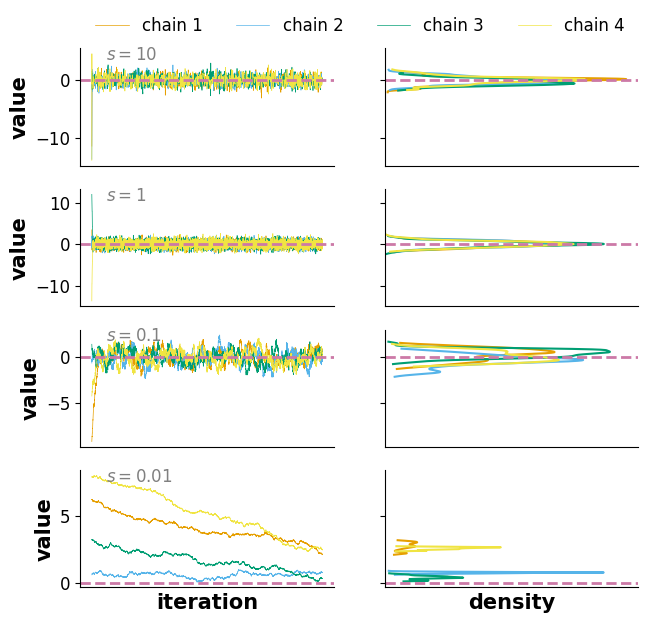

In [26]:
import seaborn as sns

palette_guide = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, ax = plt.subplots(4, 2, figsize=(7.2, 7), sharex=False, sharey="row")
ax[0, 0].plot(mcmc1["samples"][0], label='chain 1', alpha=1, lw=0.5, color=palette_guide[0])
ax[0, 0].plot(mcmc1["samples"][1], label='chain 2', alpha=1, lw=0.5, color=palette_guide[1])
ax[0, 0].plot(mcmc1["samples"][2], label='chain 3', alpha=1, lw=0.5, color=palette_guide[2])
ax[0, 0].plot(mcmc1["samples"][3], label='chain 4', alpha=1, lw=0.5, color=palette_guide[3])

sns.histplot(ax=ax[0, 1], y=np.squeeze(mcmc1["samples"][0][-1000:]), lw=3, stat="density", bins=8, kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[0], alpha=0.1)
sns.histplot(ax=ax[0, 1], y=np.squeeze(mcmc1["samples"][1][-1000:]), lw=3, stat="density", bins=8, kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[1], alpha=0.1)
sns.histplot(ax=ax[0, 1], y=np.squeeze(mcmc1["samples"][2][-1000:]), lw=3, stat="density", bins=8, kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[2], alpha=0.1)
sns.histplot(ax=ax[0, 1], y=np.squeeze(mcmc1["samples"][3][-1000:]), lw=3, stat="density", bins=8, kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[3], alpha=0.1)

ax[1, 0].plot(mcmc2["samples"][0], label='chain 1', alpha=1, lw=0.5, color=palette_guide[0])
ax[1, 0].plot(mcmc2["samples"][1], label='chain 2', alpha=1, lw=0.5, color=palette_guide[1])
ax[1, 0].plot(mcmc2["samples"][2], label='chain 3', alpha=1, lw=0.5, color=palette_guide[2])
ax[1, 0].plot(mcmc2["samples"][3], label='chain 4', alpha=1, lw=0.5, color=palette_guide[3])

sns.histplot(ax=ax[1, 1], y=np.squeeze(mcmc2["samples"][0][-1000:]),lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[0], alpha=0.1)
sns.histplot(ax=ax[1, 1], y=np.squeeze(mcmc2["samples"][1][-1000:]),lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[1], alpha=0.1)
sns.histplot(ax=ax[1, 1], y=np.squeeze(mcmc2["samples"][2][-1000:]),lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[2], alpha=0.1)
sns.histplot(ax=ax[1, 1], y=np.squeeze(mcmc2["samples"][3][-1000:]),lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[3], alpha=0.1)


####################

ax[2, 0].plot(mcmc3["samples"][0], label='chain 1', alpha=1, lw=0.5, color=palette_guide[0])
ax[2, 0].plot(mcmc3["samples"][1], label='chain 2', alpha=1, lw=0.5, color=palette_guide[1])
ax[2, 0].plot(mcmc3["samples"][2], label='chain 3', alpha=1, lw=0.5, color=palette_guide[2])
ax[2, 0].plot(mcmc3["samples"][3], label='chain 4', alpha=1, lw=0.5, color=palette_guide[3])

sns.histplot(ax=ax[2, 1], y=np.squeeze(mcmc3["samples"][0][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[0], alpha=0.1)
sns.histplot(ax=ax[2, 1], y=np.squeeze(mcmc3["samples"][1][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[1], alpha=0.1)
sns.histplot(ax=ax[2, 1], y=np.squeeze(mcmc3["samples"][2][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[2], alpha=0.1)
sns.histplot(ax=ax[2, 1], y=np.squeeze(mcmc3["samples"][3][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[3], alpha=0.1)


####################

ax[3, 0].plot(mcmc4["samples"][0], label='chain 1', alpha=1, lw=0.5, color=palette_guide[0])
ax[3, 0].plot(mcmc4["samples"][1], label='chain 2', alpha=1, lw=0.5, color=palette_guide[1])
ax[3, 0].plot(mcmc4["samples"][2], label='chain 3', alpha=1, lw=0.5, color=palette_guide[2])
ax[3, 0].plot(mcmc4["samples"][3], label='chain 4', alpha=1, lw=0.5, color=palette_guide[3])

sns.histplot(ax=ax[3, 1], y=np.squeeze(mcmc4["samples"][0][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[0], alpha=0.1)
sns.histplot(ax=ax[3, 1], y=np.squeeze(mcmc4["samples"][1][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[1], alpha=0.1)
sns.histplot(ax=ax[3, 1], y=np.squeeze(mcmc4["samples"][2][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[2], alpha=0.1)
sns.histplot(ax=ax[3, 1], y=np.squeeze(mcmc4["samples"][3][-1000:]), lw=3, stat="density", kde=True, fill=True, facecolor="w", edgecolor=None, color=palette_guide[3], alpha=0.1)


ax[2, 1].set_ylim( )
#ax.set_xlabel('MCMC iteration', weight='bold')
#ax.set_ylabel('value', weight='bold')

for axi in ax.flatten():
    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=2)

ds = [10, 1, 0.1, 0.01]
for i in range(4):
    ax[i, 0].set_ylabel("value", weight='bold')
    ax[i, 1].set_xlabel(None)
    ax[i, 0].set_xticks([])
    ax[i, 1].set_xticks([])

    ax[i, 1].spines['right'].set_visible(False)
    ax[i, 1].spines['top'].set_visible(False)

    ax[i, 0].spines['right'].set_visible(False)
    ax[i, 0].spines['top'].set_visible(False)

    ax[i, 0].text(0.1, 0.9, r"$s=${}".format(ds[i]), transform=ax[i, 0].transAxes, color="gray", weight='normal')

ax[-1, 0].set_xlabel('iteration', weight='bold')
ax[-1, 1].set_xlabel('density', weight='bold')

ax[0, 0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.4), frameon=False, ncol=4)

fig.savefig(os.path.join(path_to_figures, "1d_MCMC_MH.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')


In [27]:
def gaussian_likelihood(x, μ=0, σ=1):
    """ Quality of the proposal vector
    """
    d = x.shape[0]

    quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)

    return quality

def acceptance_probability(x, xs, likelihood=gaussian_likelihood):
    """ Acceptance probability for the Metropolis-Hastings algorithm

    Args:
        x (_type_): _description_
        xs (_type_): _description_
        likelihood (_type_, optional): _description_. Defaults to gaussian_likelihood.

    Returns:
        _type_: _description_
    """
    return likelihood(x) / likelihood(xs)


def proposal_density(x, s=0.2, d=2, samples=1):
    """ Proposal density for the Metropolis-Hastings algorithm

    Args:
        x np.array: state of the chain. It's a column vector of dimension d.
        s (float, optional): siz. Defaults to 0.2.
        d (int, optional): dimension of the . Defaults to 2.

    Returns:
        np.array: _description_
    """
    Σ = (s**2) * np.eye(d)

    xs = dist.multivariate_normal(x, Σ , size=1).T
    xs = np.squeeze(xs, axis=1)
    return xs


def mcmc_metropolis_hasting(acceptance_probability, proposal_density, x0, num_samples=1000):
    """ Metropolis-Hastings algorithm

    Args:
        quality_state (function): quality of the state
        proposal_density (function): proposal density
        x0 (np.array): initial state
        n_samples (int, optional): number of samples. Defaults to 1000.

    Returns:
        np.array: samples
    """
    d = x0.shape[0]

    samples = np.zeros((num_samples, d))
    x       = x0

    for i in tqdm.tqdm(range(num_samples)):

        xs = proposal_density(x, d=d)
        r  = dist.uniform(0, 1, size=d)
        ar = r < np.minimum(1, acceptance_probability(x, xs))

        x  = x * (~ar) + ar * xs

        samples[i, :] = x

    return samples


In [28]:


proposal1 = lambda x, d: proposal_density(x, s=10,   d=d)
proposal2 = lambda x, d: proposal_density(x, s=1,    d=d)
proposal3 = lambda x, d: proposal_density(x, s=0.1,  d=d)
proposal4 = lambda x, d: proposal_density(x, s=0.01, d=d)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

mcmc1 = {
"samples":   [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s": 0.01
}

#######
x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

mcmc2 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.1
    }

#######
x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

mcmc3 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.5
    }

#######
x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(np.array([0, 0]), s=10, d=2, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

mcmc4 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.5
    }

  0%|          | 0/10000 [00:00<?, ?it/s]/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/3502091294.py:6: RuntimeWarning: overflow encountered in exp
  quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)
100%|██████████| 10000/10000 [00:00<00:00, 28412.25it/s]


In [29]:
x = np.linspace(-5.0, 5.0, 1000)
y = np.linspace(-5.0, 5.0, 1000)

X, Y = np.meshgrid(x, y)

xx = np.vstack([x, y]).T

Z = np.exp(np.dot(xx, xx.T) / (np.sqrt(2*np.pi)))

In [30]:
def add_subplot_axes(ax, rect, axisbg='w'):
    fig    = plt.gcf()
    box    = ax.get_position()
    height = box.height
    width  = box.width

    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure    = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)
    x              = infig_position[0]
    y              = infig_position[1]
    width         *= rect[2]
    height        *= rect[3]

    subax       = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)

    return subax


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/1673848116.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/1673848116.py:90: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


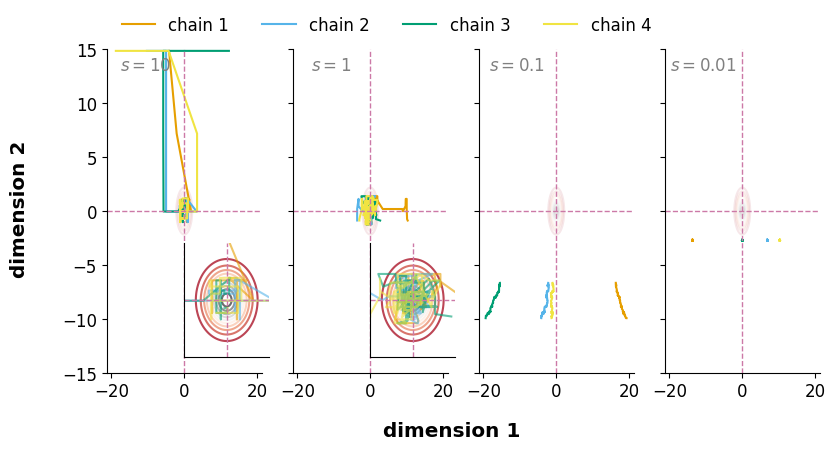

In [31]:
from scipy.stats import multivariate_normal

N    = 200
X    = np.linspace(-15, 15, N)
Y    = np.linspace(-15, 15, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
rv   = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z    = rv.pdf(pos)

X1     = np.linspace(-4, 4, N)
Y1     = np.linspace(-4, 4, N)
X1, Y1 = np.meshgrid(X1, Y1)
pos    = np.dstack((X1, Y1))
rv     = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z1     = rv.pdf(pos)

rect      = (0.5,  0.05,
                0.55,  0.35)

fig, ax = plt.subplots(1, 4, figsize=(9.2, 4.2), sharex=True, sharey=True)

cs1 = ax[0].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)
cs2 = ax[1].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)
cs3 = ax[2].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)
cs4 = ax[3].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)

ax_zoomed1          = add_subplot_axes(ax[0], rect, axisbg='w')
ax_zoomed2         = add_subplot_axes(ax[1], rect, axisbg='w')
#ax_zoomed3         = add_subplot_axes(ax[2], rect, axisbg='w')
#ax_zoomed4         = add_subplot_axes(ax[3], rect, axisbg='w')

cs1 = ax_zoomed1.contour(X1, Y1, Z1, 10, cmap='RdGy', alpha=0.8)
cs2 = ax_zoomed2.contour(X1, Y1, Z1, 10, cmap='RdGy', alpha=0.8)

zoomed = [ax_zoomed1, ax_zoomed2]

for i in range(4):
    ax[0].plot(mcmc1["samples"][i][:100:,0], mcmc1["samples"][0][:100:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    zoomed[0].plot(mcmc1["samples"][i][:100:,0], mcmc1["samples"][0][:100:,1],
               label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

for i in range(4):
    ax[1].plot(mcmc2["samples"][i][:100:,0], mcmc2["samples"][0][:100:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    zoomed[1].plot(mcmc2["samples"][i][:100:,0], mcmc2["samples"][0][:100:,1],
               label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

for i in range(4):
    ax[2].plot(mcmc3["samples"][i][:100:,0], mcmc3["samples"][0][:100:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    #zoomed[2].plot(mcmc3["samples"][i][:100:,0], mcmc3["samples"][0][:100:,1],
    #           label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

for i in range(4):
    ax[3].plot(mcmc4["samples"][i][:100:,0], mcmc4["samples"][0][:100:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    #zoomed[3].plot(mcmc4["samples"][i][:100:,0], mcmc4["samples"][0][:100:,1],
    #           label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

ds = [10, 1, 0.1, 0.01]

for i_axi, axi in enumerate(ax.flatten()):
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)
    axi.axvline(x=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)

    axi.text(0.25, 0.95, r'$s=${}'.format(ds[i_axi]), color="gray",
                    horizontalalignment='center', verticalalignment='center', transform=axi.transAxes, weight='normal')

for ax_zoom in zoomed:
    ax_zoom.spines['right'].set_visible(False)
    ax_zoom.spines['top'].set_visible(False)

    ax_zoom.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)
    ax_zoom.axvline(x=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)
    ax_zoom.set_xlim(-3, 3)
    ax_zoom.set_ylim(-3, 3)
    ax_zoom.set_xticks([])
    ax_zoom.set_yticks([])

ax[0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), frameon=False, ncol=4)

fig.supxlabel('dimension 1', weight='bold', y=-0.05)
fig.supylabel('dimension 2', weight='bold')

plt.tight_layout()


fig.savefig(os.path.join(path_to_figures, "2d_MCMC_MH_state_space.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')

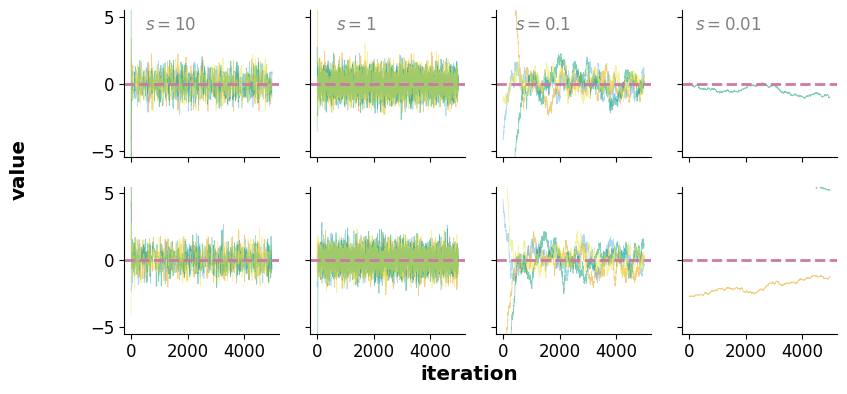

In [32]:
fig, ax = plt.subplots(2, 4, figsize=(9.2, 4.2), sharex=True, sharey=True)

for i in range(4):
    ax[0, 0].plot(mcmc1["samples"][i][:5000,0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 0].plot(mcmc1["samples"][i][:5000,1], alpha=0.5, lw=0.5, color=palette_guide[i])

for i in range(4):
    ax[0, 1].plot(mcmc2["samples"][i][:5000,0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 1].plot(mcmc2["samples"][i][:5000,1], alpha=0.5, lw=0.5, color=palette_guide[i])

for i in range(4):
    ax[0, 2].plot(mcmc3["samples"][i][:5000,0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 2].plot(mcmc3["samples"][i][:5000,1], alpha=0.5, lw=0.5, color=palette_guide[i])

for i in range(4):
    ax[0, 3].plot(mcmc4["samples"][i][:5000,0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 3].plot(mcmc4["samples"][i][:5000,1], alpha=0.5, lw=0.5, color=palette_guide[i])

for axi in ax.flatten():
    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=2)
    axi.set_ylim((-5.5, 5.5))

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

for i in range(4):
    ax[0, i].text(0.3, 0.9, r'$s=${}'.format(ds[i]), color="gray",
                    horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, weight='normal')

fig.supxlabel('iteration', weight='bold', y=-0.01)
fig.supylabel('value', weight='bold', x=0.001)

fig.savefig(os.path.join(path_to_figures, "2d_MCMC_MH_convergence.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')

In [33]:

D      = 3
center = np.array([0, 0, 0])

proposal1 = lambda x, d: proposal_density(x, s=10,   d=d)
proposal2 = lambda x, d: proposal_density(x, s=1,    d=d)
proposal3 = lambda x, d: proposal_density(x, s=0.1,  d=d)
proposal4 = lambda x, d: proposal_density(x, s=0.01, d=d)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=10000)

mcmc1 = {
"samples":   [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s": 0.01
}

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=10000)

mcmc2 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.1
    }

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=10000)

mcmc3 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.5
    }

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=10000)

mcmc4 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.5
    }

  0%|          | 0/10000 [00:00<?, ?it/s]/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/3502091294.py:6: RuntimeWarning: overflow encountered in exp
  quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)
100%|██████████| 10000/10000 [00:00<00:00, 28975.33it/s]


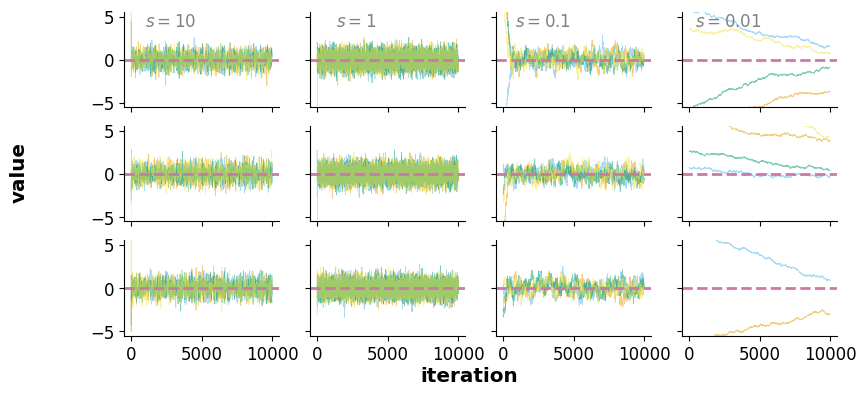

In [34]:
fig, ax = plt.subplots(3, 4, figsize=(9.2, 4.2), sharex=True, sharey=True)

for i in range(4):
    ax[0, 0].plot(mcmc1["samples"][i][:, 0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 0].plot(mcmc1["samples"][i][:, 1], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[2, 0].plot(mcmc1["samples"][i][:, 2], alpha=0.5, lw=0.5, color=palette_guide[i])

for i in range(4):
    ax[0, 1].plot(mcmc2["samples"][i][:, 0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 1].plot(mcmc2["samples"][i][:, 1], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[2, 1].plot(mcmc2["samples"][i][:, 2], alpha=0.5, lw=0.5, color=palette_guide[i])

for i in range(4):
    ax[0, 2].plot(mcmc3["samples"][i][:, 0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 2].plot(mcmc3["samples"][i][:, 1], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[2, 2].plot(mcmc3["samples"][i][:, 2], alpha=0.5, lw=0.5, color=palette_guide[i])

for i in range(4):
    ax[0, 3].plot(mcmc4["samples"][i][:, 0], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[1, 3].plot(mcmc4["samples"][i][:, 1], alpha=0.5, lw=0.5, color=palette_guide[i])
    ax[2, 3].plot(mcmc4["samples"][i][:, 2], alpha=0.5, lw=0.5, color=palette_guide[i])

for axi in ax.flatten():
    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=2)
    axi.set_ylim((-5.5, 5.5))

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

for i in range(4):
    ax[0, i].text(0.3, 0.9, r'$s=${}'.format(ds[i]), color="gray",
                    horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, weight='normal')

fig.supxlabel('iteration', weight='bold', y=-0.01)
fig.supylabel('value', weight='bold', x=0.001)

fig.savefig(os.path.join(path_to_figures, "3d_MCMC_MH_convergence.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')

# including noise in one dimension at a time

In [45]:
def acceptance_probability(x, xs, likelihood=gaussian_likelihood):
    """ Acceptance probability for the Metropolis-Hastings algorithm

    Args:
        x (_type_): _description_
        xs (_type_): _description_
        likelihood (_type_, optional): _description_. Defaults to gaussian_likelihood.

    Returns:
        _type_: _description_
    """
    return likelihood(x) / likelihood(xs)


def proposal_density(x, s=0.2, d=2, samples=1):
    """ Proposal density for the Metropolis-Hastings algorithm

    Args:
        x np.array: state of the chain. It's a column vector of dimension d.
        s (float, optional): siz. Defaults to 0.2.
        d (int, optional): dimension of the . Defaults to 2.

    Returns:
        np.array: _description_
    """
    Σ = (s**2) * np.eye(d)

    xs = dist.multivariate_normal(x, Σ , size=1).T
    xs = np.squeeze(xs, axis=1)
    return xs


def mcmc_metropolis_hasting(acceptance_probability, proposal_density, x0, num_samples=1000):
    """ Metropolis-Hastings algorithm

    Args:
        quality_state (function): quality of the state
        proposal_density (function): proposal density
        x0 (np.array): initial state
        n_samples (int, optional): number of samples. Defaults to 1000.

    Returns:
        np.array: samples
    """
    d = x0.shape[0]

    samples = np.zeros((int(num_samples*d), d))
    x       = x0

    for i in tqdm.tqdm(range(int(num_samples*d))):
        for i, xi in enumerate(x):

            xi = np.array([xi])
            xσ = proposal_density(xi, d=1)

            r  = dist.uniform(0, 1)
            if r < np.minimum(1, acceptance_probability(xi, xσ)):
                x[i] = xσ
            samples[i, :] = x

    return samples


In [59]:

D      = 2
center = np.array([0, 0])

proposal1 = lambda x, d: proposal_density(x, s=10,   d=1)
proposal2 = lambda x, d: proposal_density(x, s=1,    d=1)
proposal3 = lambda x, d: proposal_density(x, s=0.1,  d=1)
proposal4 = lambda x, d: proposal_density(x, s=0.01, d=1)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=5000)

mcmc1 = {
"samples":   [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s": 0.01
}

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=5000)

mcmc2 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.1
    }

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=5000)

mcmc3 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.5
    }

#######

x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=5000)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=5000)

mcmc4 = {
        "samples":    [samples1, samples2, samples3, samples4],
        "num_chains": 4,
        "s":          0.5
    }

  0%|          | 0/10000 [00:00<?, ?it/s]/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/2613654421.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = xσ
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/3502091294.py:6: RuntimeWarning: overflow encountered in exp
  quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)
100%|██████████| 10000/10000 [00:00<00:00, 13413.42it/s]


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/809339650.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/809339650.py:90: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


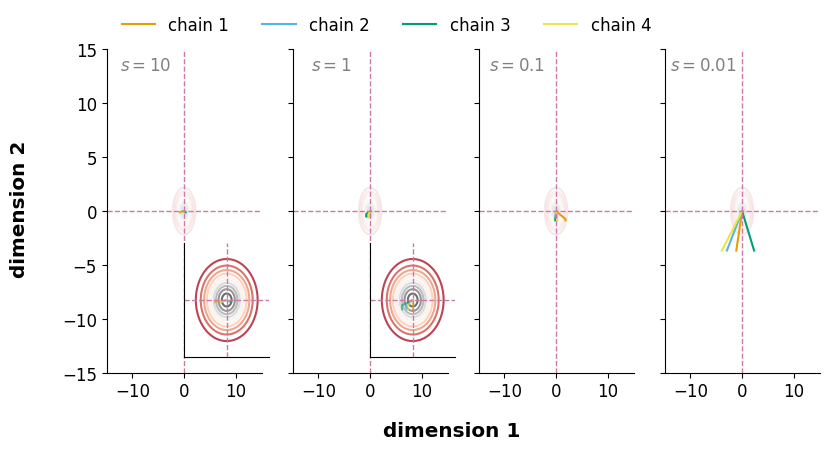

In [60]:
from scipy.stats import multivariate_normal

N    = 200
X    = np.linspace(-15, 15, N)
Y    = np.linspace(-15, 15, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
rv   = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z    = rv.pdf(pos)

X1     = np.linspace(-4, 4, N)
Y1     = np.linspace(-4, 4, N)
X1, Y1 = np.meshgrid(X1, Y1)
pos    = np.dstack((X1, Y1))
rv     = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z1     = rv.pdf(pos)

rect      = (0.5,  0.05,
                0.55,  0.35)

fig, ax = plt.subplots(1, 4, figsize=(9.2, 4.2), sharex=True, sharey=True)

cs1 = ax[0].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)
cs2 = ax[1].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)
cs3 = ax[2].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)
cs4 = ax[3].contour(X, Y, Z, 10, cmap='RdGy', alpha=0.1)

ax_zoomed1          = add_subplot_axes(ax[0], rect, axisbg='w')
ax_zoomed2         = add_subplot_axes(ax[1], rect, axisbg='w')
#ax_zoomed3         = add_subplot_axes(ax[2], rect, axisbg='w')
#ax_zoomed4         = add_subplot_axes(ax[3], rect, axisbg='w')

cs1 = ax_zoomed1.contour(X1, Y1, Z1, 10, cmap='RdGy', alpha=0.8)
cs2 = ax_zoomed2.contour(X1, Y1, Z1, 10, cmap='RdGy', alpha=0.8)

zoomed = [ax_zoomed1, ax_zoomed2]

for i in range(4):
    ax[0].plot(mcmc1["samples"][i][:,0], mcmc1["samples"][0][:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    zoomed[0].plot(mcmc1["samples"][i][:,0], mcmc1["samples"][0][:,1],
               label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

for i in range(4):
    ax[1].plot(mcmc2["samples"][i][:,0], mcmc2["samples"][0][:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    zoomed[1].plot(mcmc2["samples"][i][:,0], mcmc2["samples"][0][:,1],
               label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

for i in range(4):
    ax[2].plot(mcmc3["samples"][i][:,0], mcmc3["samples"][0][:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    #zoomed[2].plot(mcmc3["samples"][i][:,0], mcmc3["samples"][0][:,1],
    #           label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

for i in range(4):
    ax[3].plot(mcmc4["samples"][i][:,0], mcmc4["samples"][0][:,1],
               label=f'chain {i+1}', alpha=1, lw=1.5, color=palette_guide[i])
    #zoomed[3].plot(mcmc4["samples"][i][:100:,0], mcmc4["samples"][0][:100:,1],
    #           label=f'chain {i+1}', alpha=0.6, lw=1.5, color=palette_guide[i])

ds = [10, 1, 0.1, 0.01]

for i_axi, axi in enumerate(ax.flatten()):
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)
    axi.axvline(x=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)

    axi.text(0.25, 0.95, r'$s=${}'.format(ds[i_axi]), color="gray",
                    horizontalalignment='center', verticalalignment='center', transform=axi.transAxes, weight='normal')

for ax_zoom in zoomed:
    ax_zoom.spines['right'].set_visible(False)
    ax_zoom.spines['top'].set_visible(False)

    ax_zoom.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)
    ax_zoom.axvline(x=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1)
    ax_zoom.set_xlim(-3, 3)
    ax_zoom.set_ylim(-3, 3)
    ax_zoom.set_xticks([])
    ax_zoom.set_yticks([])

ax[0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), frameon=False, ncol=4)

fig.supxlabel('dimension 1', weight='bold', y=-0.05)
fig.supylabel('dimension 2', weight='bold')

plt.tight_layout()


fig.savefig(os.path.join(path_to_figures, "2d_MCMC_MH_oneAtATime_state_space.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')

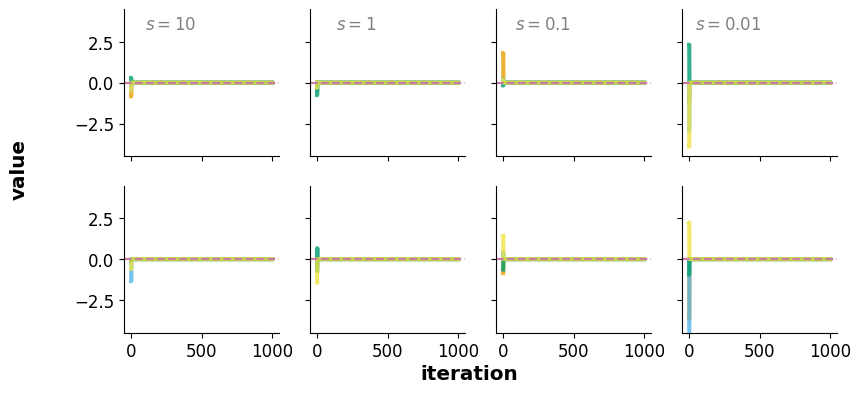

In [61]:
fig, ax = plt.subplots(2, 4, figsize=(9.2, 4.2), sharex=True, sharey=True)

for i in range(4):
    ax[0, 0].plot(mcmc1["samples"][i][:1000,0], alpha=0.8, lw=3, color=palette_guide[i])
    ax[1, 0].plot(mcmc1["samples"][i][:1000,1], alpha=0.8, lw=3, color=palette_guide[i])

for i in range(4):
    ax[0, 1].plot(mcmc2["samples"][i][:1000,0], alpha=0.8, lw=3, color=palette_guide[i])
    ax[1, 1].plot(mcmc2["samples"][i][:1000,1], alpha=0.8, lw=3, color=palette_guide[i])

for i in range(4):
    ax[0, 2].plot(mcmc3["samples"][i][:1000,0], alpha=0.8, lw=3, color=palette_guide[i])
    ax[1, 2].plot(mcmc3["samples"][i][:1000,1], alpha=0.8, lw=3, color=palette_guide[i])

for i in range(4):
    ax[0, 3].plot(mcmc4["samples"][i][:1000,0], alpha=0.8, lw=3, color=palette_guide[i])
    ax[1, 3].plot(mcmc4["samples"][i][:1000,1], alpha=0.8, lw=3, color=palette_guide[i])

for axi in ax.flatten():
    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1.5)
    axi.set_ylim((-4.5, 4.5))

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

for i in range(4):
    ax[0, i].text(0.3, 0.9, r'$s=${}'.format(ds[i]), color="gray",
                    horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, weight='normal')

fig.supxlabel('iteration', weight='bold', y=-0.01)
fig.supylabel('value', weight='bold', x=0.001)

fig.savefig(os.path.join(path_to_figures, "2d_MCMC_MH_convergence_one_at_a_time.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')

In [66]:

D      = 3
center = np.array([0, 0, 0])

proposal1 = lambda x, d: proposal_density(x, s=10,   d=1)
proposal2 = lambda x, d: proposal_density(x, s=1,    d=1)
proposal3 = lambda x, d: proposal_density(x, s=0.1,  d=1)
proposal4 = lambda x, d: proposal_density(x, s=0.01, d=1)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal1, x0, num_samples=500)

mcmc1 = {
"samples":   [samples1, samples2, samples3, samples4],
"num_chains": 4,
"s": 0.01
}

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal2, x0, num_samples=500)

mcmc2 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.1
    }

#######
x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal3, x0, num_samples=500)

mcmc3 = {
    "samples":    [samples1, samples2, samples3, samples4],
    "num_chains": 4,
    "s":          0.5
    }

#######

x0       = proposal_density(center, s=10, d=D, samples=1)
samples1 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples2 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples3 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=500)

x0       = proposal_density(center, s=10, d=D, samples=1)
samples4 = mcmc_metropolis_hasting(acceptance_probability, proposal4, x0, num_samples=500)

mcmc4 = {
        "samples":    [samples1, samples2, samples3, samples4],
        "num_chains": 4,
        "s":          0.5
    }

  0%|          | 0/1500 [00:00<?, ?it/s]/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/2613654421.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = xσ
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_40808/3502091294.py:6: RuntimeWarning: overflow encountered in exp
  quality = np.exp((x-μ)**2/σ**2) / np.sqrt(2*np.pi*σ**2)
100%|██████████| 1500/1500 [00:00<00:00, 9438.06it/s]


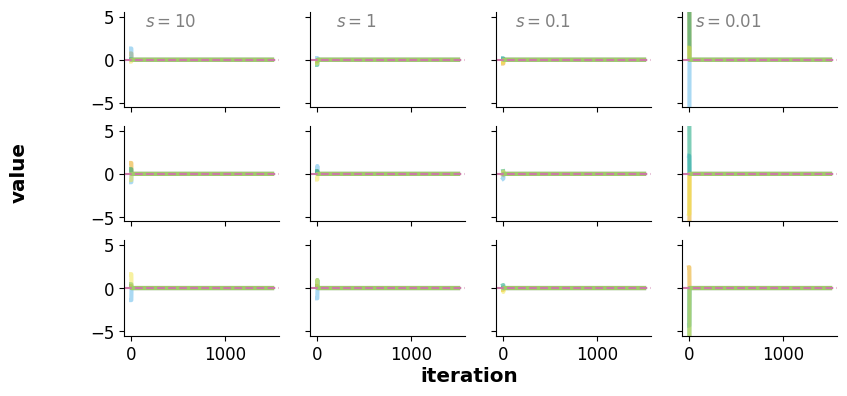

In [67]:
fig, ax = plt.subplots(3, 4, figsize=(9.2, 4.2), sharex=True, sharey=True)

for i in range(4):
    ax[0, 0].plot(mcmc1["samples"][i][:, 0], alpha=0.5, lw=3, color=palette_guide[i])
    ax[1, 0].plot(mcmc1["samples"][i][:, 1], alpha=0.5, lw=3, color=palette_guide[i])
    ax[2, 0].plot(mcmc1["samples"][i][:, 2], alpha=0.5, lw=3, color=palette_guide[i])

for i in range(4):
    ax[0, 1].plot(mcmc2["samples"][i][:, 0], alpha=0.5, lw=3, color=palette_guide[i])
    ax[1, 1].plot(mcmc2["samples"][i][:, 1], alpha=0.5, lw=3, color=palette_guide[i])
    ax[2, 1].plot(mcmc2["samples"][i][:, 2], alpha=0.5, lw=3, color=palette_guide[i])

for i in range(4):
    ax[0, 2].plot(mcmc3["samples"][i][:, 0], alpha=0.5, lw=3, color=palette_guide[i])
    ax[1, 2].plot(mcmc3["samples"][i][:, 1], alpha=0.5, lw=3, color=palette_guide[i])
    ax[2, 2].plot(mcmc3["samples"][i][:, 2], alpha=0.5, lw=3, color=palette_guide[i])

for i in range(4):
    ax[0, 3].plot(mcmc4["samples"][i][:, 0], alpha=0.5, lw=3, color=palette_guide[i])
    ax[1, 3].plot(mcmc4["samples"][i][:, 1], alpha=0.5, lw=3, color=palette_guide[i])
    ax[2, 3].plot(mcmc4["samples"][i][:, 2], alpha=0.5, lw=3, color=palette_guide[i])

for axi in ax.flatten():
    axi.axhline(y=0, color=palette_guide[-1], linestyle='--', alpha=1, lw=1.5)
    axi.set_ylim((-5.5, 5.5))

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

for i in range(4):
    ax[0, i].text(0.3, 0.9, r'$s=${}'.format(ds[i]), color="gray",
                    horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, weight='normal')

fig.supxlabel('iteration', weight='bold', y=-0.01)
fig.supylabel('value', weight='bold', x=0.001)

fig.savefig(os.path.join(path_to_figures, "3d_MCMC_MH_convergence_one_at_a_time.png"),
                                            dpi=300, transparent=True, bbox_inches='tight')